In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
! pip install tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


In [7]:
df_train=pd.read_csv(r'C:\train.csv')
df_test=pd.read_csv(r'C:\test.csv')

In [8]:
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

## Exploratory Data Analysis

In [12]:
df_train.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [13]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:xlabel='malignant', ylabel='count'>

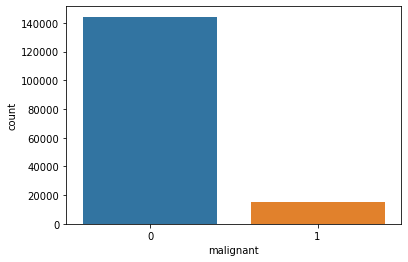

In [16]:
sns.countplot(df_train['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

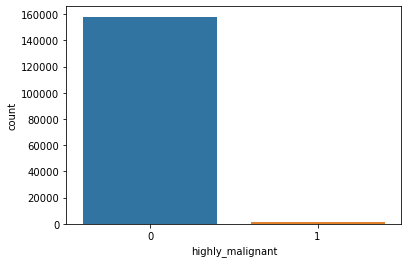

In [17]:
sns.countplot(df_train['highly_malignant'])

<AxesSubplot:xlabel='rude', ylabel='count'>

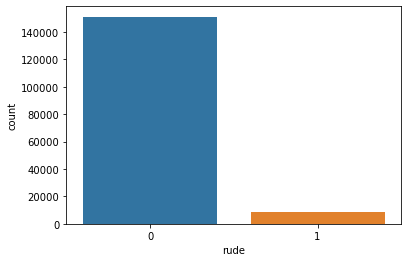

In [19]:
sns.countplot(df_train['rude'])

<AxesSubplot:xlabel='abuse', ylabel='count'>

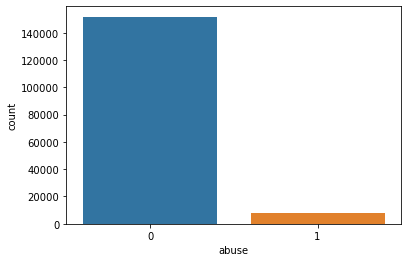

In [20]:
sns.countplot(df_train['abuse'])

<AxesSubplot:xlabel='threat', ylabel='count'>

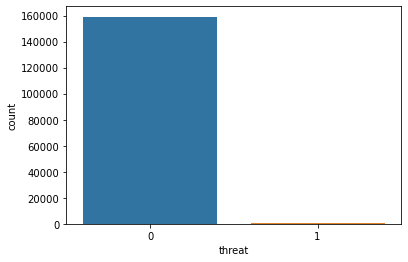

In [21]:
sns.countplot(df_train['threat'])

<AxesSubplot:xlabel='loathe', ylabel='count'>

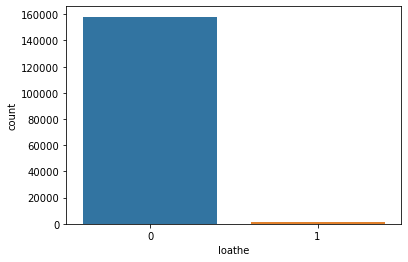

In [22]:
sns.countplot(df_train['loathe'])

In [23]:
#Check the numer of comments that are malignant
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [24]:
df_count=df_train.iloc[:,2:].sum()

In [25]:
df_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

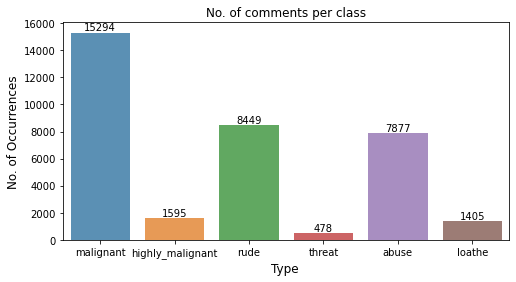

In [29]:
plt.figure(figsize=(8,4))
ax = sns.barplot(df_count.index, df_count.values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = df_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [34]:
num_rows = len(df_train)
print(num_rows)

159571


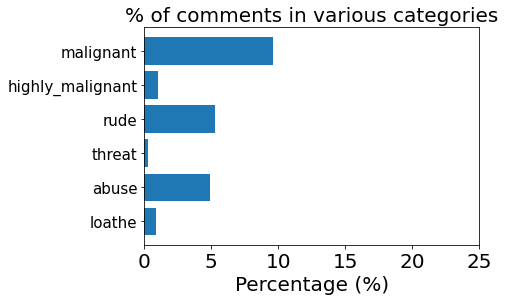

In [35]:
sum_mal = df_train['malignant'].sum() / num_rows * 100
sum_hig = df_train['highly_malignant'].sum() / num_rows * 100
sum_rude = df_train['rude'].sum() / num_rows * 100
sum_thr = df_train['threat'].sum() / num_rows * 100
sum_abu = df_train['abuse'].sum() / num_rows * 100
sum_loa = df_train['loathe'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_mal, sum_hig, sum_rude, sum_thr, sum_abu, sum_loa])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=20)
plt.yticks(ind, ('malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe' ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

## Data Preprocessing

In [36]:
# Text preprocessing steps - remove numbers, capital letters, punctuation and '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df_train['comment_text'] = df_train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df_train['comment_text'][3]

'  more i can t make any real suggestions on improvement   i wondered if the section statistics should be later on  or a subsection of   types of accidents     i think the references may need tidying so that they are all in the exact same format ie date format etc  i can do that later on  if no one else does first   if you have any preferences for formatting style on references or want to do it yourself please let me know   there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up  it s listed in the relevant form eg wikipedia good article nominations transport   '

In [38]:
#Separating dataset into six sections.
df_train_mal=df_train.loc[:,['id','comment_text','malignant']]

In [39]:
df_train_mal['comment_text'][5]

'   congratulations from me as well  use the tools well     talk  '

In [41]:
df_train_high=df_train.loc[:,['id','comment_text','highly_malignant']]

In [43]:
df_train_rude=df_train.loc[:,['id','comment_text','rude']]

In [44]:
df_train_thr=df_train.loc[:,['id','comment_text','threat']]

In [46]:
df_train_abu=df_train.loc[:,['id','comment_text','abuse']]

In [47]:
df_train_loa=df_train.loc[:,['id','comment_text','loathe']]

In [49]:
#Creating WordCloud to see the most frequently occuring words in each category.
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [53]:
def wordcloud(df,label):
    ss=df[df[label]==1]
    txt=ss.comment_text.values
    wc=WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(txt))
    
    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Frequently used words in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(random_state=244),alpha=0.98)

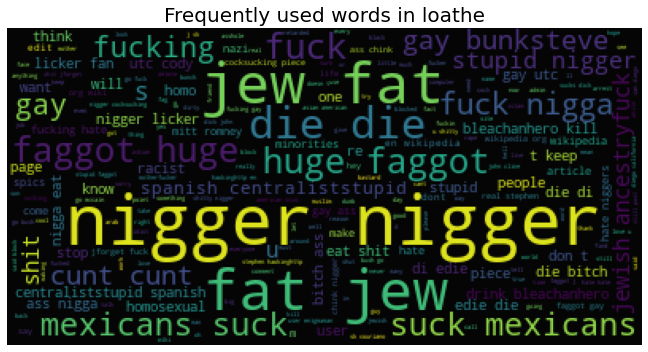

In [54]:
wordcloud(df_train_loa,'loathe')

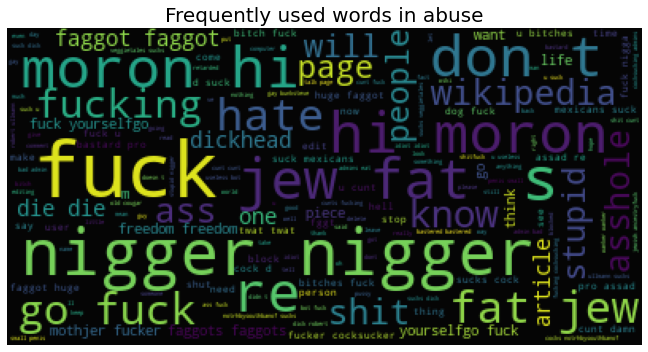

In [55]:
wordcloud(df_train_abu,'abuse')

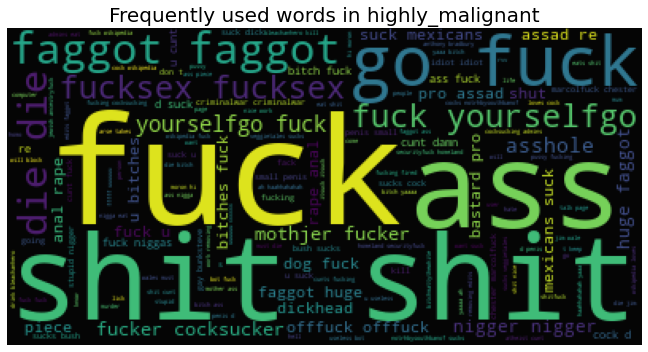

In [56]:
wordcloud(df_train_high,'highly_malignant')

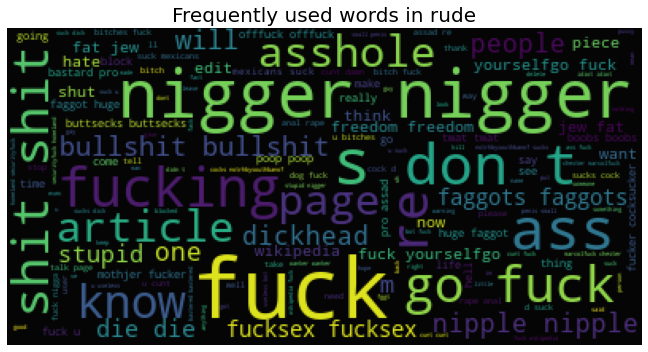

In [57]:
wordcloud(df_train_rude,'rude')

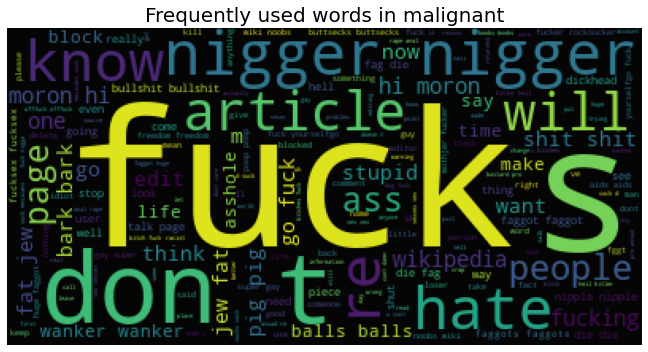

In [58]:
wordcloud(df_train_mal,'malignant')

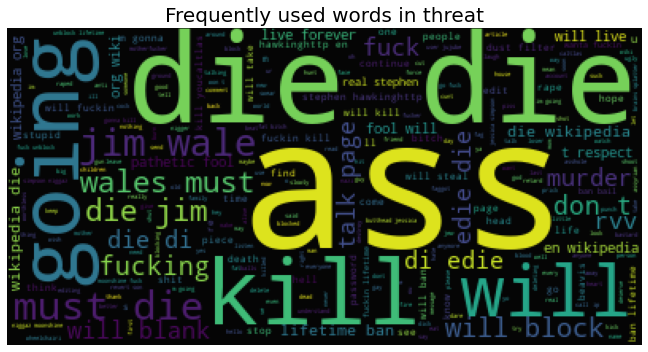

In [59]:
wordcloud(df_train_thr,'threat')

In [60]:
df_train_mal.head()

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d aww  he matches this background colour i m s...   
2  000113f07ec002fd  hey man  i m really not trying to edit war  it...   
3  0001b41b1c6bb37e    more i can t make any real suggestions on im...   
4  0001d958c54c6e35  you  sir  are my hero  any chance you remember...   

   malignant  
0          0  
1          0  
2          0  
3          0  
4          0

In [62]:
df_train_mal1=df_train_mal[df_train_mal['malignant']==1].iloc[0:5000,:]
df_train_mal1.shape

(5000, 3)

In [64]:
df_train_mal0=df_train_mal[df_train_mal['malignant']==0].iloc[0:5000,:]


In [65]:
df_train_mal_done=pd.concat([df_train_mal1,df_train_mal0],axis=0)
df_train_mal_done.shape

(10000, 3)

In [67]:
#Likewise balance all the categories
df_train_high[df_train_high['highly_malignant']==1].count()


id                  1595
comment_text        1595
highly_malignant    1595
dtype: int64

In [68]:
df_train_high1=df_train_high[df_train_high['highly_malignant']==1].iloc[0:1595,:]
df_train_high0=df_train_high[df_train_high['highly_malignant']==0].iloc[0:1595,:]
df_train_high_done=pd.concat([df_train_high1,df_train_high0],axis=0)
df_train_high_done.shape

(3190, 3)

In [69]:
df_train_rude[df_train_rude['rude']==1].count()

id              8449
comment_text    8449
rude            8449
dtype: int64

In [70]:
df_train_rude1=df_train_rude[df_train_rude['rude']==1].iloc[0:5000,:]
df_train_rude0=df_train_rude[df_train_rude['rude']==0].iloc[0:5000,:]
df_train_rude_done=pd.concat([df_train_rude1,df_train_rude0],axis=0)
df_train_rude_done.shape

(10000, 3)

In [71]:
df_train_thr[df_train_thr['threat']==1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [73]:
df_train_thr1=df_train_thr[df_train_thr['threat']==1].iloc[0:478,:]
df_train_thr0=df_train_thr[df_train_thr['threat']==0].iloc[0:1912,:]
#summing up 1912 comments that have no threat, as the number of threat comments 
#is very less 
df_train_thr_done=pd.concat([df_train_thr1,df_train_thr0],axis=0)
df_train_thr_done.shape

(2390, 3)

In [74]:
df_train_abu[df_train_abu['abuse']==1].count()


id              7877
comment_text    7877
abuse           7877
dtype: int64

In [76]:
df_train_abu1=df_train_abu[df_train_abu['abuse']==1].iloc[0:5000,:]
df_train_abu0=df_train_abu[df_train_abu['abuse']==0].iloc[0:5000,:]
df_train_abu_done=pd.concat([df_train_abu1,df_train_abu0],axis=0)
df_train_abu_done.shape

(10000, 3)

In [77]:
df_train_loa[df_train_loa['loathe']==1].count()

id              1405
comment_text    1405
loathe          1405
dtype: int64

In [78]:
df_train_loa1=df_train_loa[df_train_loa['loathe']==1].iloc[0:1405,:]
df_train_loa0=df_train_loa[df_train_loa['loathe']==0].iloc[0:5620,:]
df_train_loa_done=pd.concat([df_train_loa1,df_train_loa0],axis=0)
df_train_loa_done.shape

(7025, 3)

## Data Training Algorithms

In [79]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [83]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    # Split the data into X and y data sets
    x = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    x_train_cv1 = cv1.fit_transform(x_train) # Learn the vocabulary dictionary and return term-document matrix
    x_test_cv1  = cv1.transform(x_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(x_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    
    lr = LogisticRegression()
    lr.fit(x_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train_cv1, y_train)
    
    bnb = BernoulliNB()
    bnb.fit(x_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(x_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(x_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(x_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(x_test_cv1), y_test), f1_score(knn.predict(x_test_cv1), y_test), 
                                f1_score(bnb.predict(x_test_cv1), y_test), f1_score(mnb.predict(x_test_cv1), y_test),
                                f1_score(svm_model.predict(x_test_cv1), y_test), f1_score(randomforest.predict(x_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1


### Creating TF-IDF vectorizer for each category

In [84]:
df_mal_cv=cv_tf_train_test(df_train_mal_done,'malignant',TfidfVectorizer,(1,1))
df_mal_cv.rename(columns={'F1 Score':'F1 Score(malignant)'},inplace=True)
df_mal_cv

lr done
bnb done
mnb done
rdf done


F1 Score(malignant)
Log Regression             0.860941
KNN                        0.170616
BernoulliNB                0.776521
MultinomialNB              0.874958
SVM                        0.876510
Random Forest              0.835621

In [85]:
df_high_cv=cv_tf_train_test(df_train_high_done,'highly_malignant',TfidfVectorizer,(1,1))
df_high_cv.rename(columns={'F1 Score':'F1 Score(highly_malignant)'},inplace=True)
df_high_cv

lr done
bnb done
mnb done
rdf done


F1 Score(highly_malignant)
Log Regression                    0.927879
KNN                               0.837809
BernoulliNB                       0.803707
MultinomialNB                     0.936170
SVM                               0.926004
Random Forest                     0.927660

In [86]:
df_rude_cv=cv_tf_train_test(df_train_rude_done,'rude',TfidfVectorizer,(1,1))
df_rude_cv.rename(columns={'F1 Score':'F1 Score(rude)'},inplace=True)
df_rude_cv

lr done
bnb done
mnb done
rdf done


F1 Score(rude)
Log Regression        0.908655
KNN                   0.410982
BernoulliNB           0.787830
MultinomialNB         0.901399
SVM                   0.921378
Random Forest         0.907370

In [87]:
df_thr_cv=cv_tf_train_test(df_train_thr_done,'threat',TfidfVectorizer,(1,1))
df_thr_cv.rename(columns={'F1 Score':'F1 Score(threat)'},inplace=True)
df_thr_cv

lr done
bnb done
mnb done
rdf done


F1 Score(threat)
Log Regression          0.628821
KNN                     0.586207
BernoulliNB             0.311828
MultinomialNB           0.504762
SVM                     0.786765
Random Forest           0.800000

In [88]:
df_abu_cv=cv_tf_train_test(df_train_abu_done,'abuse',TfidfVectorizer,(1,1))
df_abu_cv.rename(columns={'F1 Score':'F1 Score(abuse)'},inplace=True)
df_abu_cv

lr done
bnb done
mnb done
rdf done


F1 Score(abuse)
Log Regression         0.896599
KNN                    0.244898
BernoulliNB            0.783762
MultinomialNB          0.897411
SVM                    0.902619
Random Forest          0.882616

In [89]:
df_loa_cv=cv_tf_train_test(df_train_loa_done,'loathe',TfidfVectorizer,(1,1))
df_loa_cv.rename(columns={'F1 Score':'F1 Score(loathe)'},inplace=True)
df_loa_cv

lr done
bnb done
mnb done
rdf done


F1 Score(loathe)
Log Regression          0.699029
KNN                     0.197980
BernoulliNB             0.549206
MultinomialNB           0.485857
SVM                     0.797516
Random Forest           0.769821

In [90]:
#Creating a dataframe to compare the results
final=pd.concat([df_mal_cv,df_high_cv,df_rude_cv,df_thr_cv,df_abu_cv,df_loa_cv],axis=1)
final

F1 Score(malignant)  F1 Score(highly_malignant)  \
Log Regression             0.860941                    0.927879   
KNN                        0.170616                    0.837809   
BernoulliNB                0.776521                    0.803707   
MultinomialNB              0.874958                    0.936170   
SVM                        0.876510                    0.926004   
Random Forest              0.835621                    0.927660   

                F1 Score(rude)  F1 Score(threat)  F1 Score(abuse)  \
Log Regression        0.908655          0.628821         0.896599   
KNN                   0.410982          0.586207         0.244898   
BernoulliNB           0.787830          0.311828         0.783762   
MultinomialNB         0.901399          0.504762         0.897411   
SVM                   0.921378          0.786765         0.902619   
Random Forest         0.907370          0.800000         0.882616   

                F1 Score(loathe)  
Log Regression          0.699029  
KNN                     0.197980  
BernoulliNB             0.549206  
MultinomialNB           0.485857  
SVM                     0.797516  
Random Forest           0.769821

In [106]:
#Transposing the dataframe to make it suitable to plot a graph
final_trans=final.transpose()
final_trans

Log Regression       KNN  BernoulliNB  \
F1 Score(malignant)               0.860941  0.170616     0.776521   
F1 Score(highly_malignant)        0.927879  0.837809     0.803707   
F1 Score(rude)                    0.908655  0.410982     0.787830   
F1 Score(threat)                  0.628821  0.586207     0.311828   
F1 Score(abuse)                   0.896599  0.244898     0.783762   
F1 Score(loathe)                  0.699029  0.197980     0.549206   

                            MultinomialNB       SVM  Random Forest  
F1 Score(malignant)              0.874958  0.876510       0.835621  
F1 Score(highly_malignant)       0.936170  0.926004       0.927660  
F1 Score(rude)                   0.901399  0.921378       0.907370  
F1 Score(threat)                 0.504762  0.786765       0.800000  
F1 Score(abuse)                  0.897411  0.902619       0.882616  
F1 Score(loathe)                 0.485857  0.797516       0.769821

Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

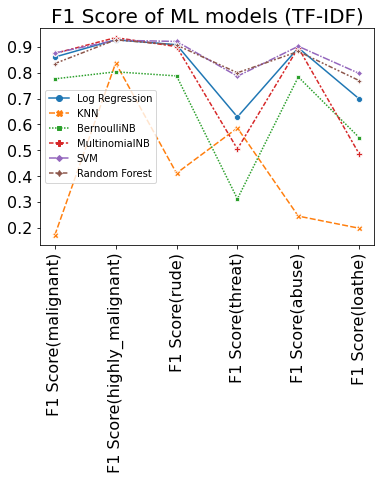

In [109]:
sns.lineplot(data=final_trans, markers=True)
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

# Repeat this for CountVectorizer as well

Support Vector Machine and Random Forest Classifier gives the best result.

### Testing our code.

In [110]:
df_train_mal_done.head()

id                                       comment_text  \
6   0002bcb3da6cb337       cocksucker before you piss around on my work   
12  0005c987bdfc9d4b  hey    what is it       talk   what is it    a...   
16  0007e25b2121310b  bye    don t look  come or think of comming ba...   
42  001810bf8c45bf5f  you are gay or antisemmitian    archangel whit...   
43  00190820581d90ce           fuck your filthy mother in the ass  dry    

    malignant  
6           1  
12          1  
16          1  
42          1  
43          1

In [111]:
x = df_train_mal_done.comment_text
y = df_train_mal_done['malignant']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

x_train_fit = tfv.fit_transform(x_train)  # Convert the X data into a document term matrix dataframe
x_test_fit = tfv.transform(x_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(x_train_fit, y_train)
randomforest.predict(x_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [112]:
test=df_test
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [117]:
# Sample Prediction
test_vect = tfv.transform(test['comment_text'])
randomforest.predict_proba(test_vect)[:,1]

array([0.92      , 0.12258283, 0.15674026, ..., 0.12492857, 0.1803355 ,
       0.7       ])

### Conclusion

Random Forest Classifier and SVM gives the best result.